# 다중분류 - 아이리스, 베스트 모델, 조기 종료

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [3]:
iris=load_iris()
iris_std=StandardScaler().fit_transform(iris.data)
y_onehot = to_categorical(iris.target)
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_std, y_onehot, stratify=y_onehot, test_size=0.2,
    random_state=seed
)

In [4]:
iris.target.shape

(150,)

- 모델 정의/설정/학습/평가

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model=Sequential([
                  Dense(12,input_dim=4,activation='relu'),
                  Dense(8,activation='relu'),
                  Dense(3,activation='softmax')
                  ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [8]:
mc = ModelCheckpoint('iris_best.h5',monitor='val_loss',
                     verbose=1,save_best_only=True)
es = EarlyStopping(patience=30)

In [9]:
hist=model.fit(X_train, Y_train,validation_split=0.2,
               epochs=1000,
               batch_size=100,
               callbacks=[mc,es],
               verbose=0)


Epoch 1: val_loss improved from inf to 1.22967, saving model to iris_best.h5

Epoch 2: val_loss improved from 1.22967 to 1.22161, saving model to iris_best.h5

Epoch 3: val_loss improved from 1.22161 to 1.21356, saving model to iris_best.h5

Epoch 4: val_loss improved from 1.21356 to 1.20554, saving model to iris_best.h5

Epoch 5: val_loss improved from 1.20554 to 1.19754, saving model to iris_best.h5

Epoch 6: val_loss improved from 1.19754 to 1.18948, saving model to iris_best.h5

Epoch 7: val_loss improved from 1.18948 to 1.18150, saving model to iris_best.h5

Epoch 8: val_loss improved from 1.18150 to 1.17360, saving model to iris_best.h5

Epoch 9: val_loss improved from 1.17360 to 1.16575, saving model to iris_best.h5

Epoch 10: val_loss improved from 1.16575 to 1.15808, saving model to iris_best.h5

Epoch 11: val_loss improved from 1.15808 to 1.15050, saving model to iris_best.h5

Epoch 12: val_loss improved from 1.15050 to 1.14297, saving model to iris_best.h5

Epoch 13: val_lo

In [10]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.1612 - accuracy: 0.9000


[0.16116997599601746, 0.8999999761581421]

In [11]:
best_model = load_model('iris_best.h5')
best_model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 115ms/step - loss: 0.1612 - accuracy: 0.9000


[0.16116997599601746, 0.8999999761581421]

In [12]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1, len(y_acc)+1)

Text(0.5, 0, 'Epoch')

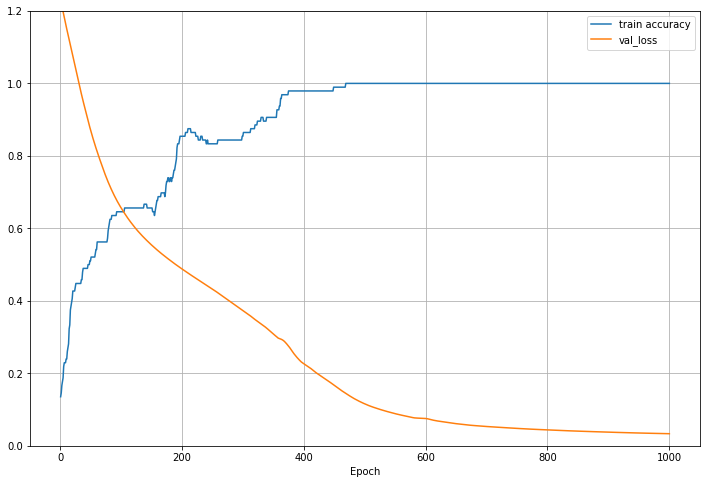

In [13]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc,label='train accuracy')
plt.plot(xs,y_vloss,label='val_loss')
plt.legend(),
plt.ylim([0,1.2])
plt.grid(),
plt.xlabel('Epoch')
#대체로 val-loss는 한번 고개를 드는데 
#얘는 아직 안 든 거 보면 학습 더 많이 하면 더 낮아질 여지가 있다. 